In [2]:
df_raw = pd.read_csv('../train.csv')
df_raw.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
def isstr(col):   ##  데이터가 문자인 컬럼을 찾는 함수
    if type(col[0]) == str:
        return True
strcolum_name=[]
i=0
col_names = df_raw.columns
for col in col_names:  ## 데이터가 문자인 컬럼의 행번호 추출 
    if isstr(df_raw[col]):
        strcolum_name.append(i)
    i+=1
strcolum_name.append(80) ## 추출된 행번호에 SalePrice의 행번호 추가
df_str = df_raw.iloc[:, strcolum_name] ## 데이터가 문자인 컬럼만 추출
df_str.tail()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,142125
1459,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal,147500


In [5]:
df_new = df_str  
col_names = df_new.columns[0:-1]  ## 컬럼의 이름 
ls=[]
for col_name in col_names:           
    df1 = pd.DataFrame(df_new, columns=[col_name,"SalePrice"])   ## 컬럼 하나를 뽑아냄   
    df11 =  df1.groupby([col_name])["SalePrice"].median().reset_index(name='Median').sort_values('Median').reset_index(drop=True)  ## 데이터별로 카운팅된 DF
    def isgrade(data) :                      ## 데이터를 숫자로 바꿔주는 주는 함수
        for idx in range(len(df11)):
            if data == df11[col_name][idx]:
                return idx+1
    df_new[col_name + 'Grade'] = df_new[col_name].apply(isgrade)  

df_new = df_new.iloc[:,39:]
df_new["SalePrice"] = df_str["SalePrice"]
df_new.tail()


C:\Users\hosua\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,MSZoningGrade,StreetGrade,LotShapeGrade,LandContourGrade,UtilitiesGrade,LotConfigGrade,LandSlopeGrade,NeighborhoodGrade,Condition1Grade,Condition2Grade,...,KitchenQualGrade,FunctionalGrade,GarageTypeGrade,GarageFinishGrade,GarageQualGrade,GarageCondGrade,PavedDriveGrade,SaleTypeGrade,SaleConditionGrade,SalePrice
1455,4,2,1,2,2,1,1,14,4,5,...,2,7,5.0,2.0,4.0,5.0,3,6,5,175000
1456,4,2,1,2,2,1,1,15,4,5,...,2,4,5.0,1.0,4.0,5.0,3,6,5,210000
1457,4,2,1,2,2,1,1,19,4,5,...,3,7,5.0,2.0,4.0,5.0,3,6,5,266500
1458,4,2,1,2,2,1,1,10,4,5,...,3,7,5.0,1.0,4.0,5.0,3,6,5,142125
1459,4,2,1,2,2,1,1,5,4,5,...,2,7,5.0,3.0,4.0,5.0,3,6,5,147500


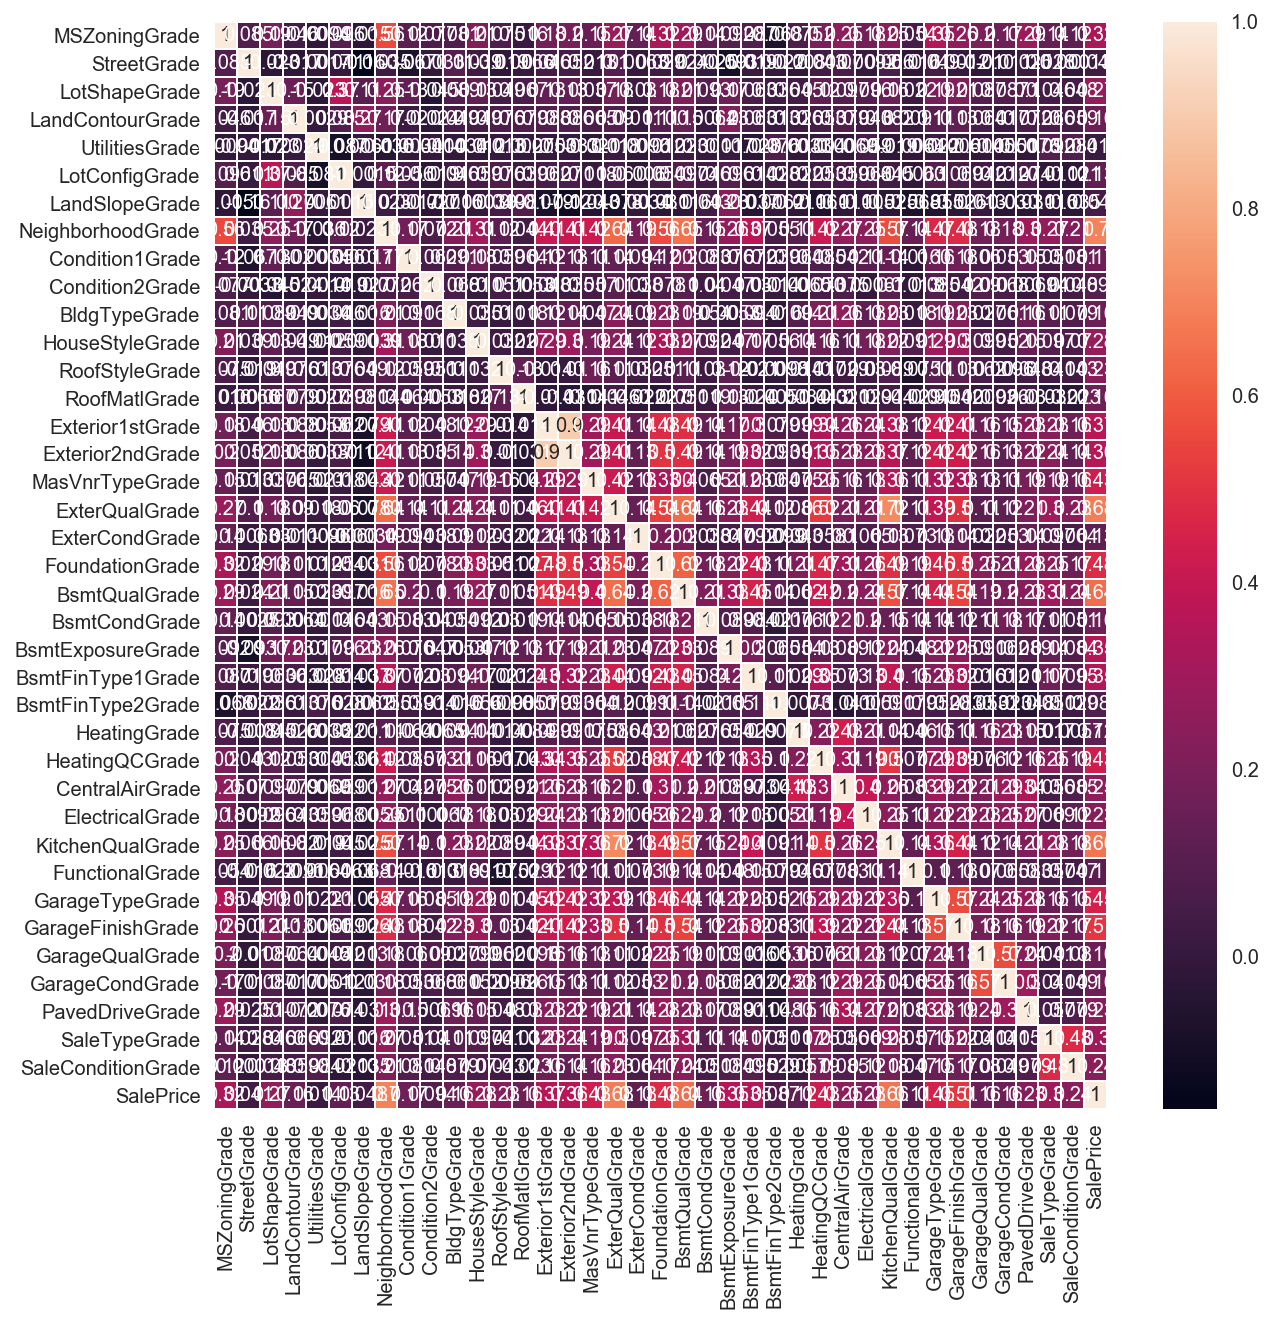

In [6]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
heat= df_new.corr()   ## 상관계수
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(heat.iloc[:, :], annot=True, linewidths=.5, ax=ax)

In [8]:
heat["SalePrice"].sort_values(ascending=False)  ## 상관계수 오름차순
heat_colname = heat["SalePrice"].sort_values(ascending=False)
print(heat_colname)
heat_colname = heat_colname.index ## 상관계수의 오른차순 컬럼이름들

SalePrice             1.000000
NeighborhoodGrade     0.696158
ExterQualGrade        0.682639
KitchenQualGrade      0.659600
BsmtQualGrade         0.644019
GarageFinishGrade     0.513105
FoundationGrade       0.478431
GarageTypeGrade       0.445945
MasVnrTypeGrade       0.429020
HeatingQCGrade        0.427649
Exterior1stGrade      0.371018
Exterior2ndGrade      0.362052
BsmtFinType1Grade     0.354137
BsmtExposureGrade     0.352958
MSZoningGrade         0.324610
SaleTypeGrade         0.297769
HouseStyleGrade       0.276306
LotShapeGrade         0.265699
CentralAirGrade       0.251328
SaleConditionGrade    0.238111
ElectricalGrade       0.233590
RoofStyleGrade        0.233188
PavedDriveGrade       0.231357
Condition1Grade       0.167154
GarageCondGrade       0.162827
RoofMatlGrade         0.161131
BsmtCondGrade         0.160658
LandContourGrade      0.158437
GarageQualGrade       0.156800
BldgTypeGrade         0.155368
LotConfigGrade        0.134475
ExterCondGrade        0.125332
HeatingG

C:\Users\hosua\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


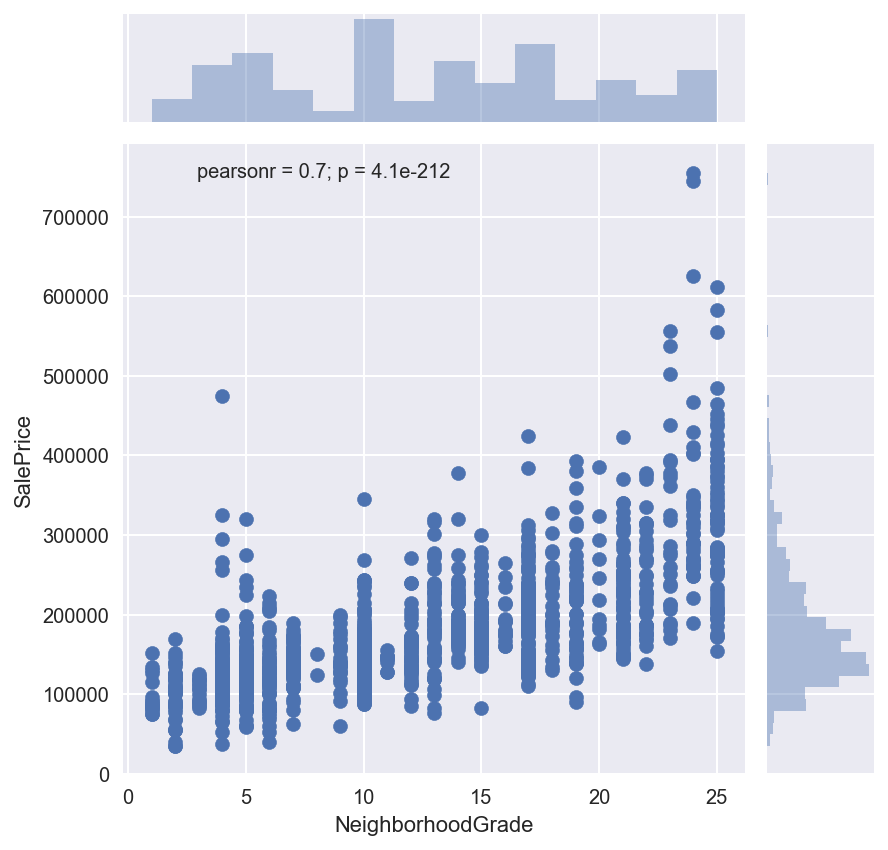

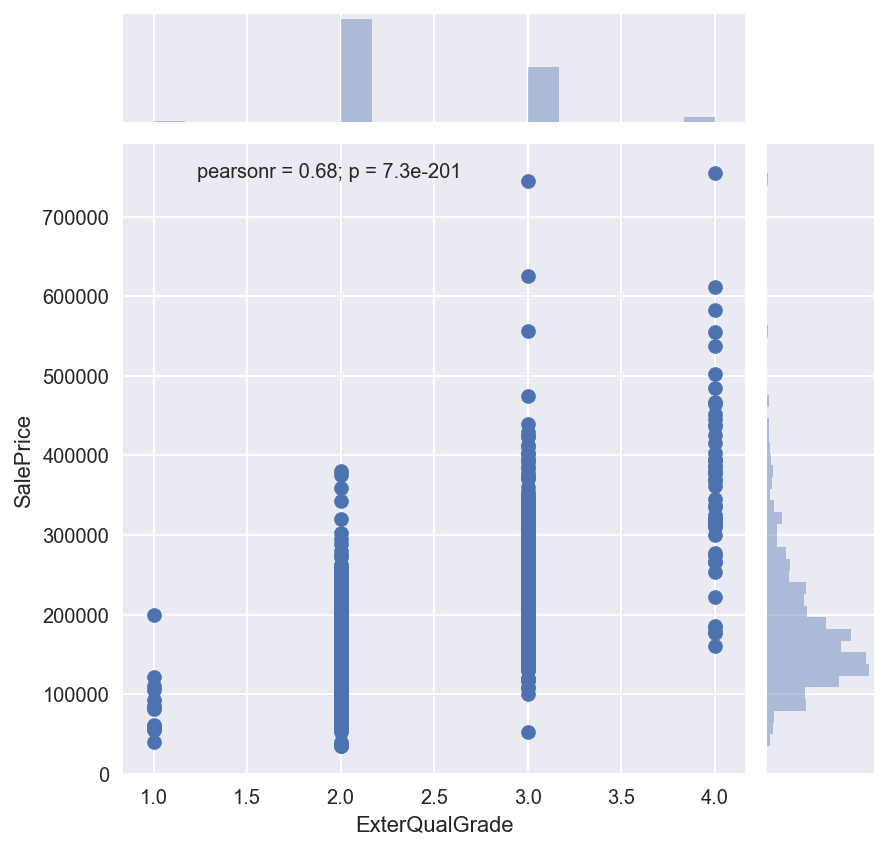

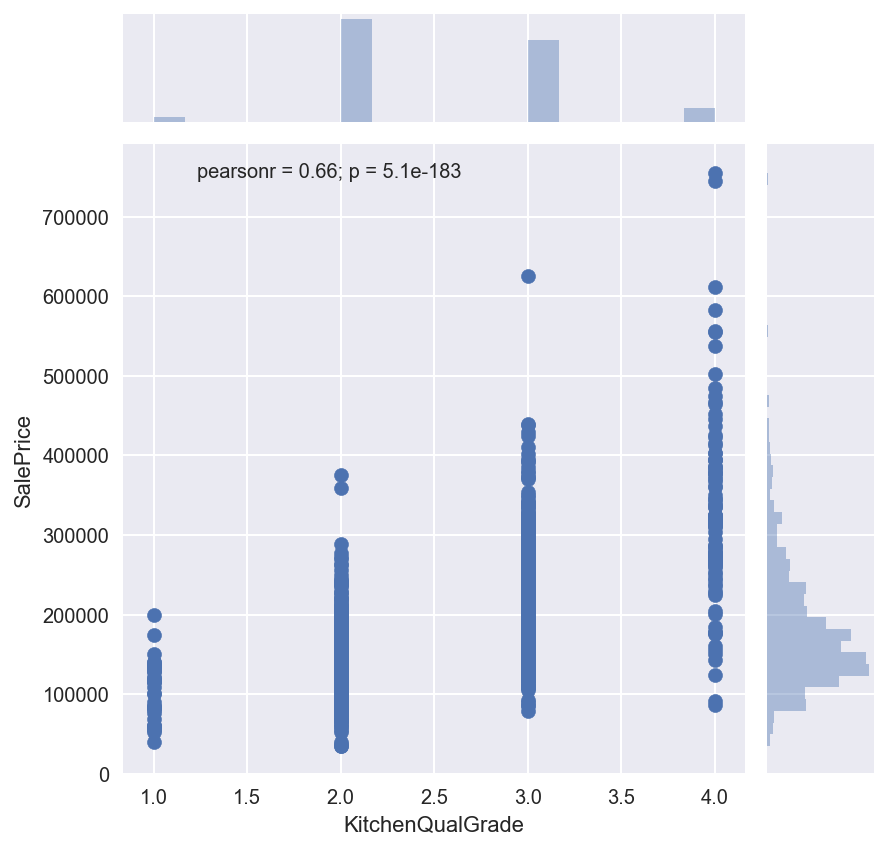

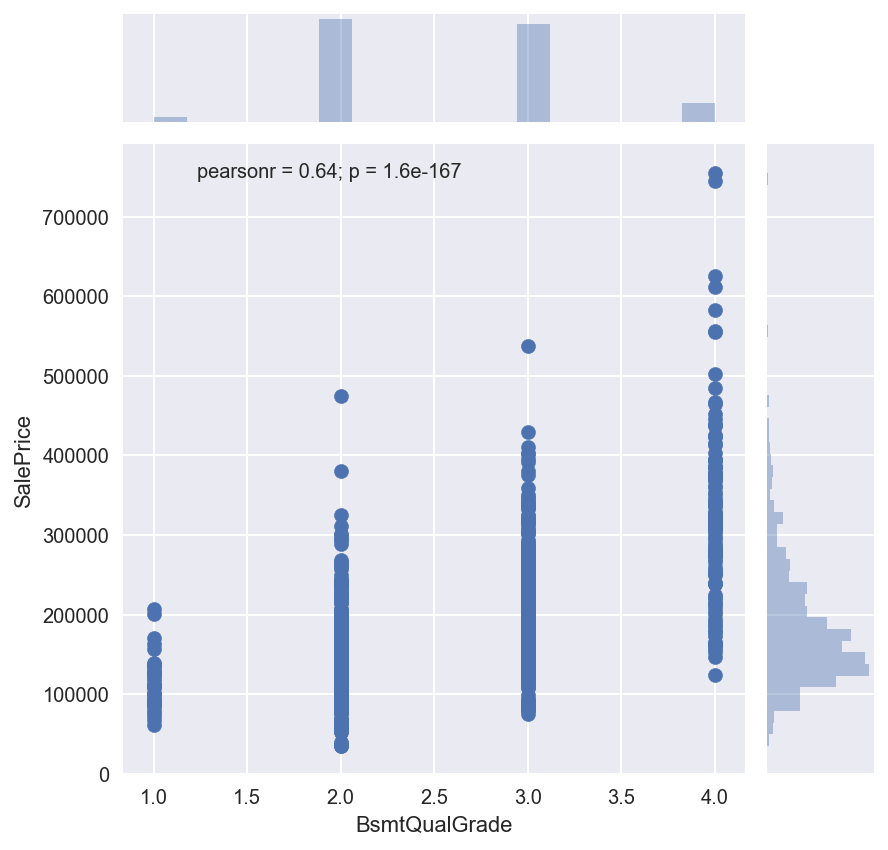

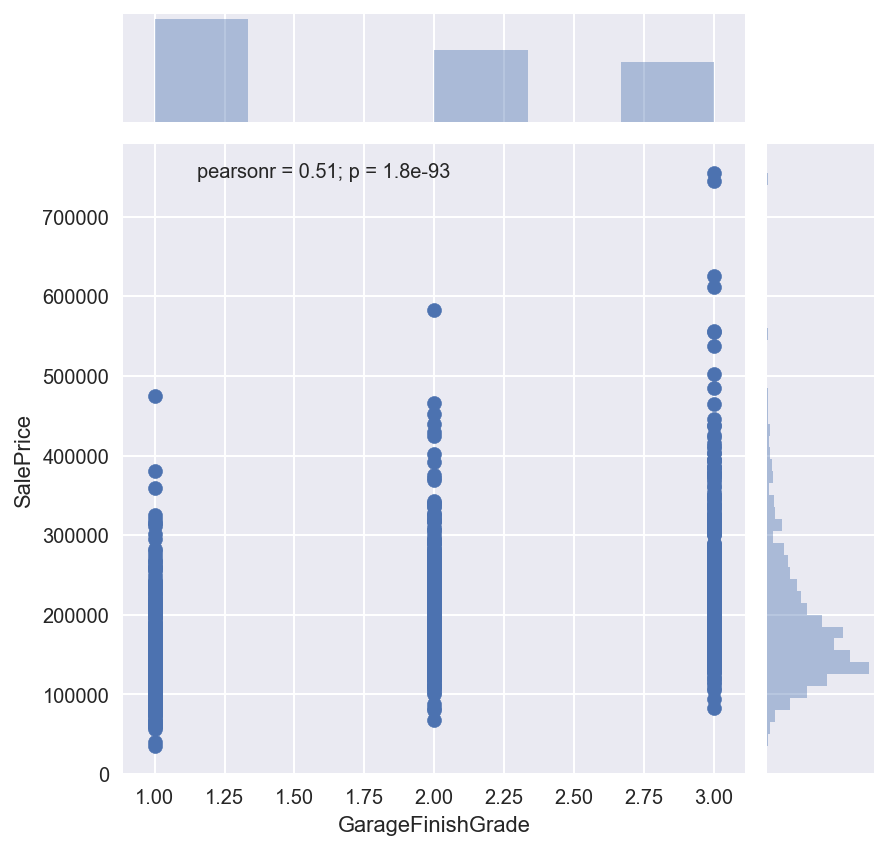

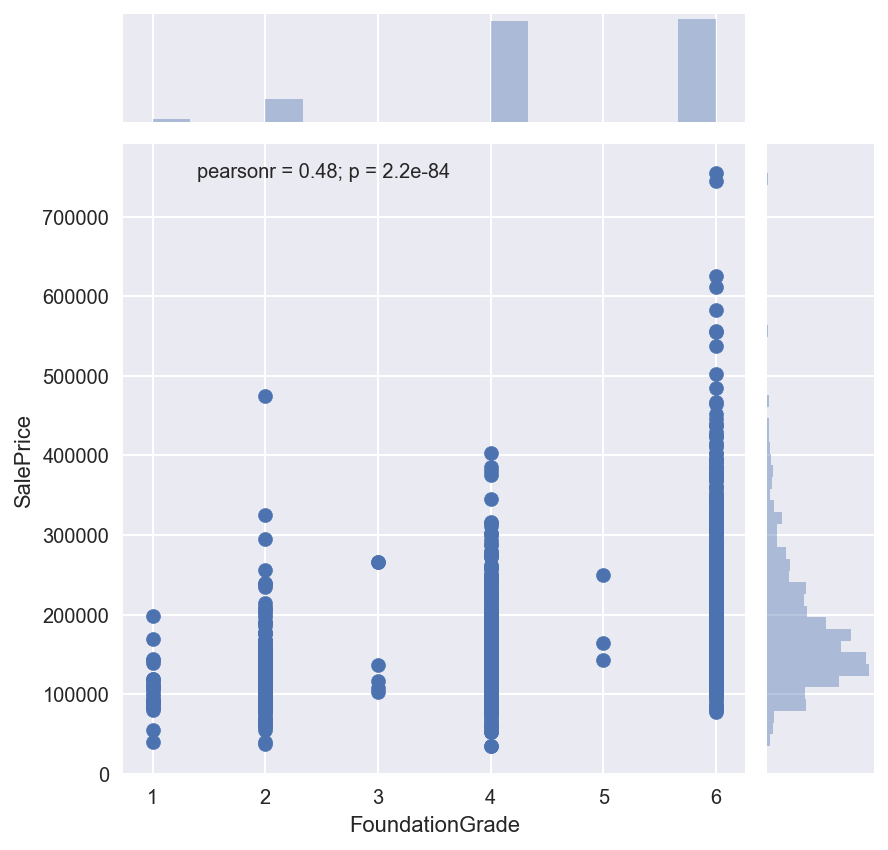

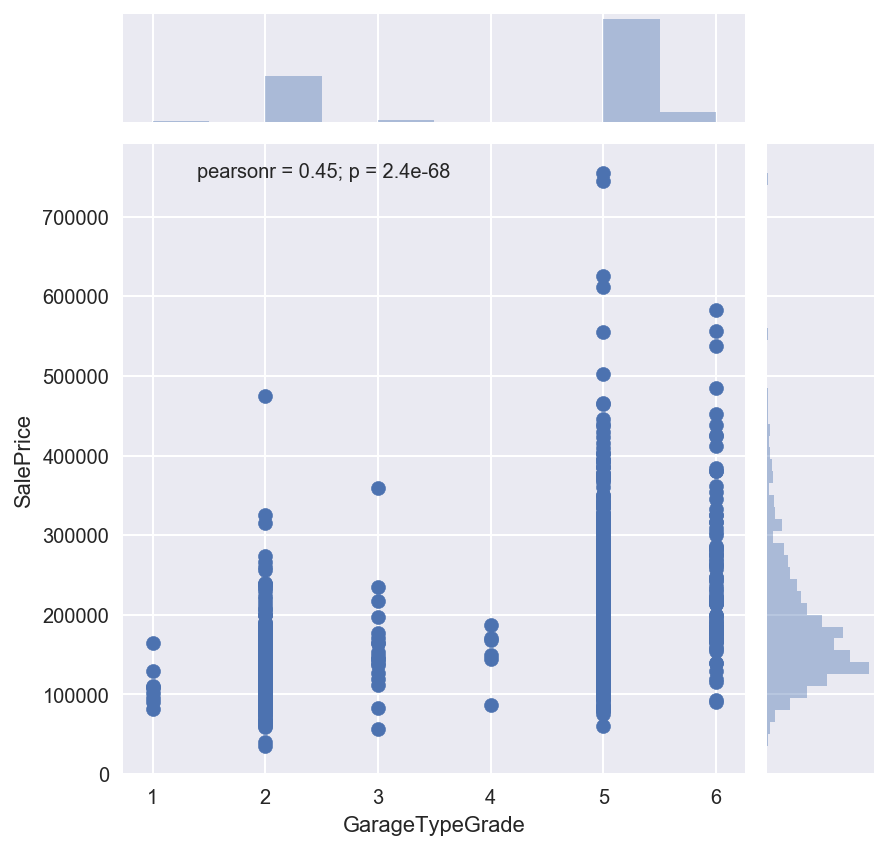

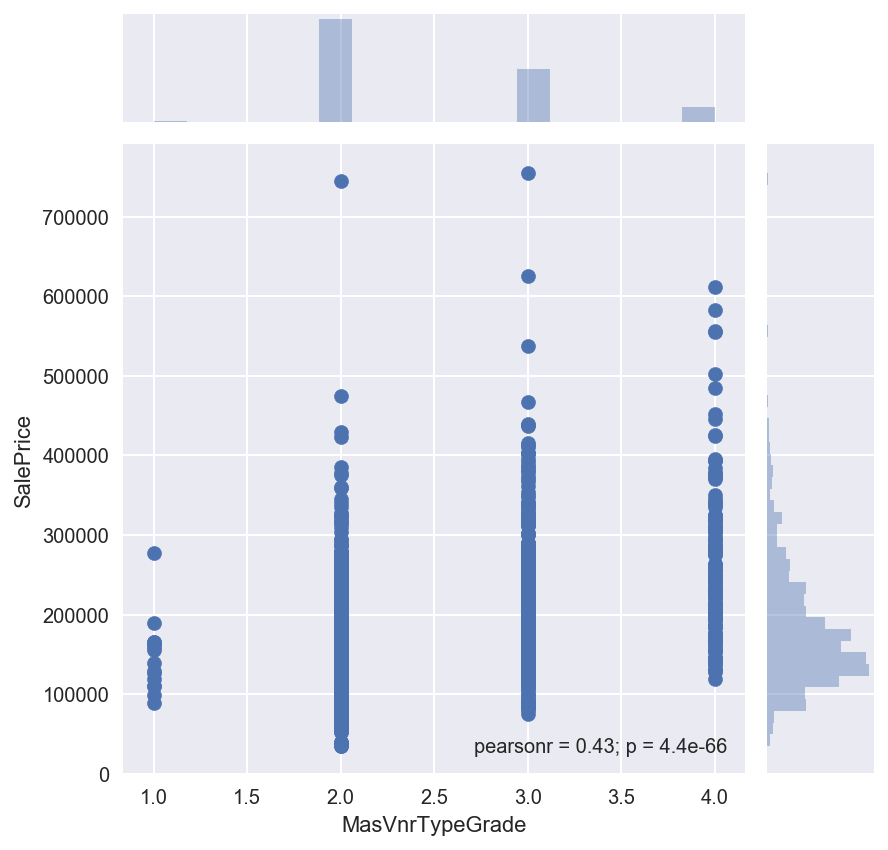

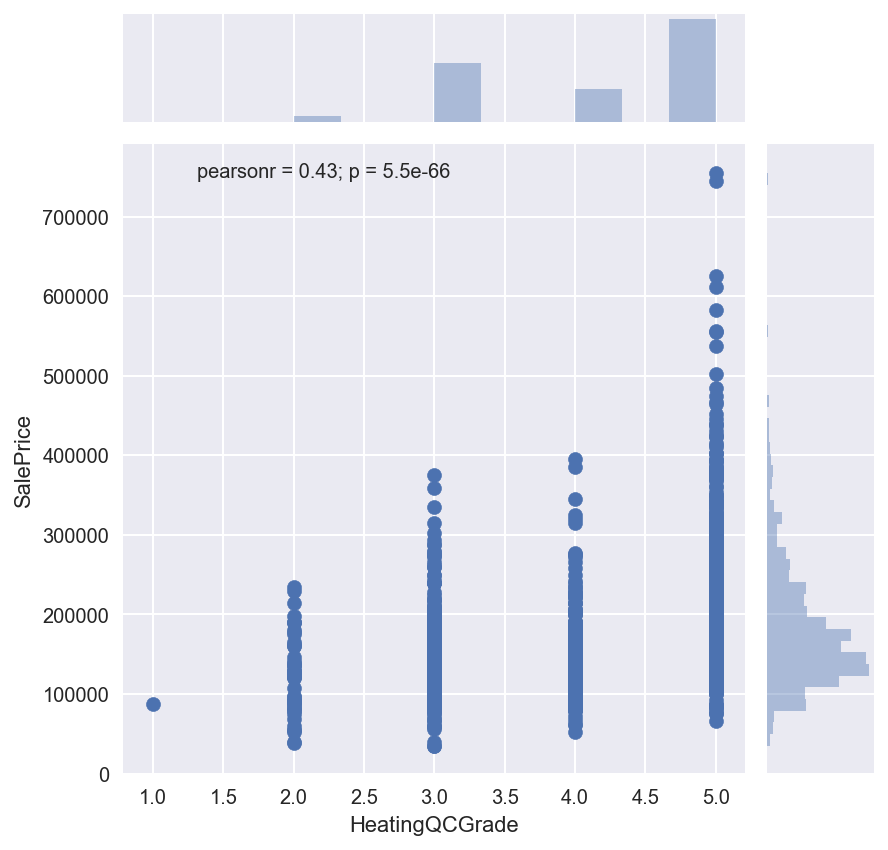

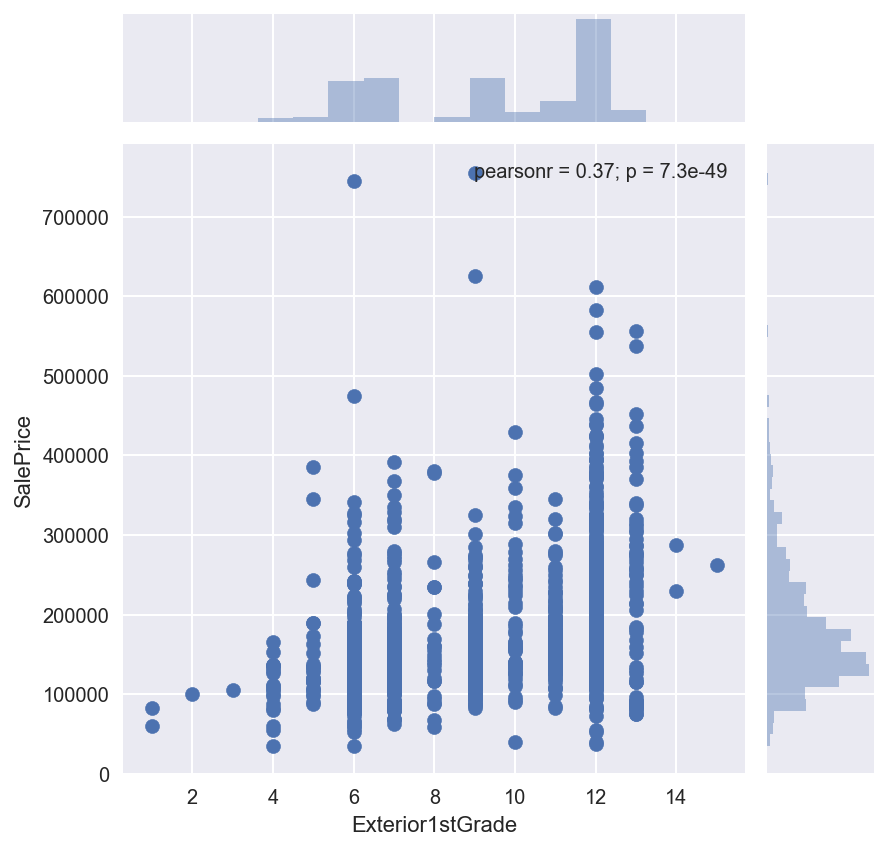

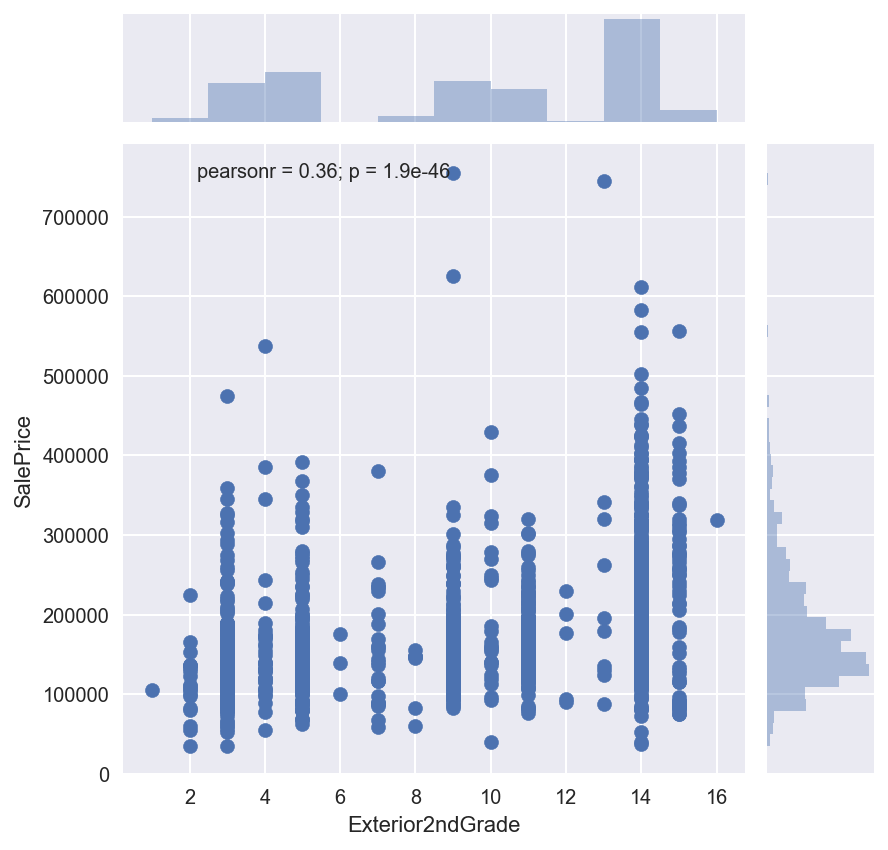

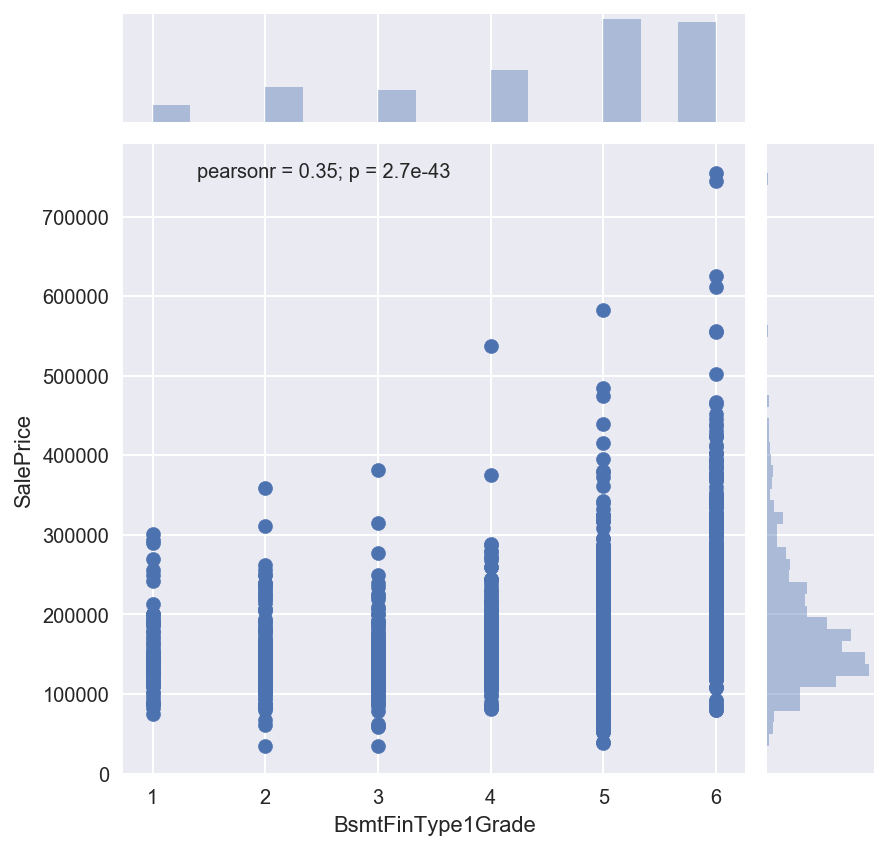

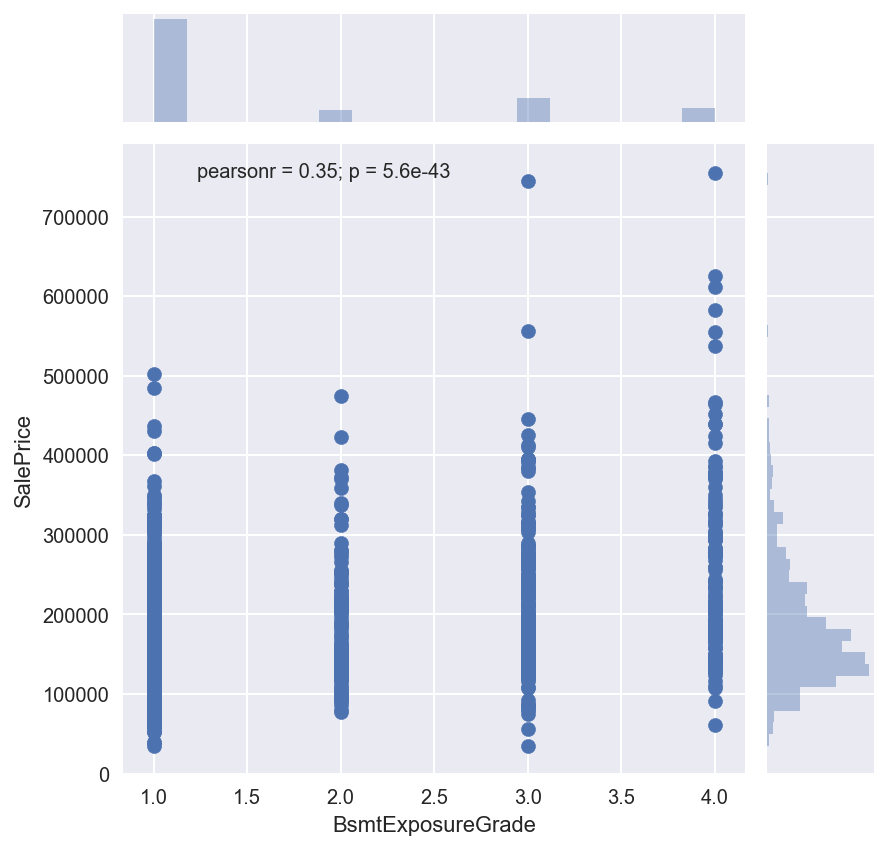

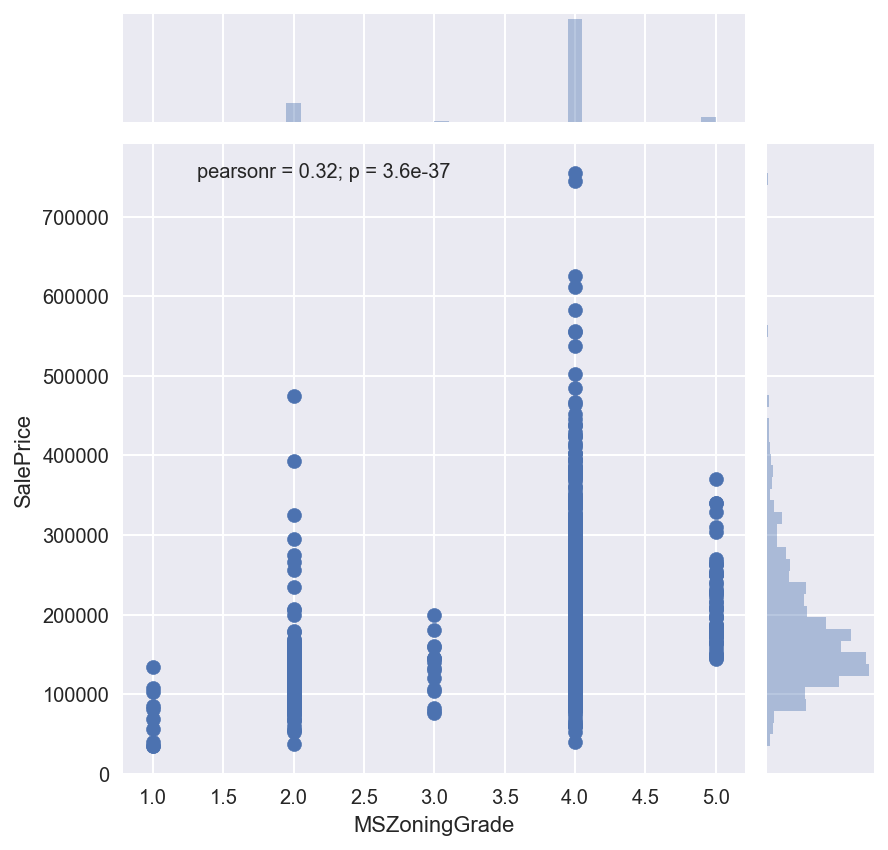

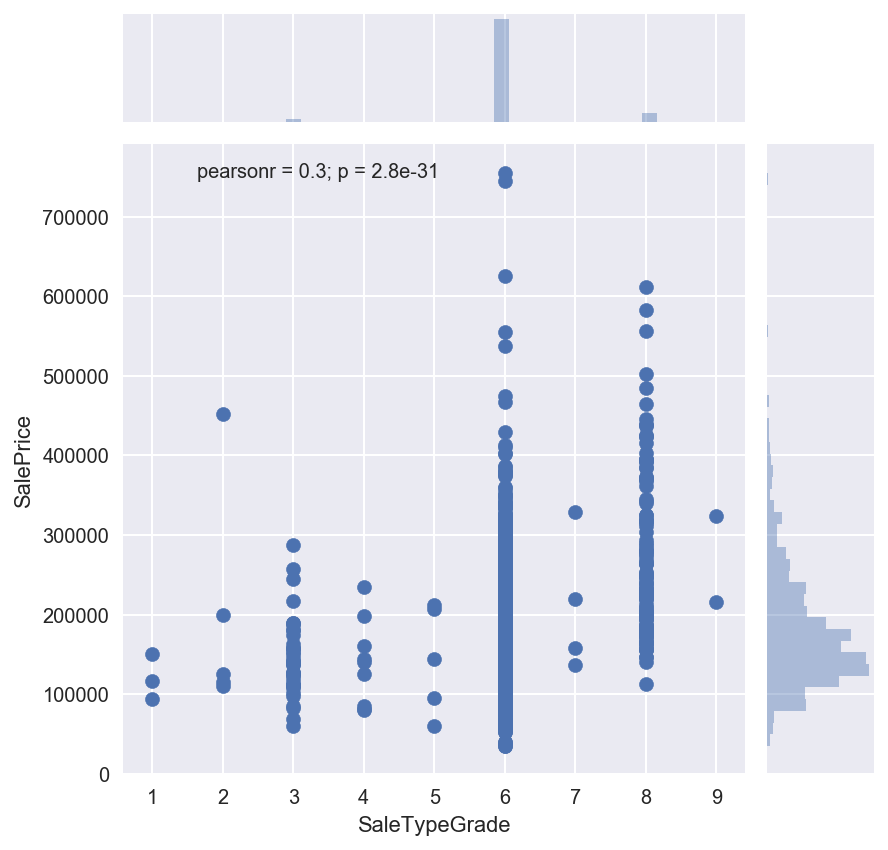

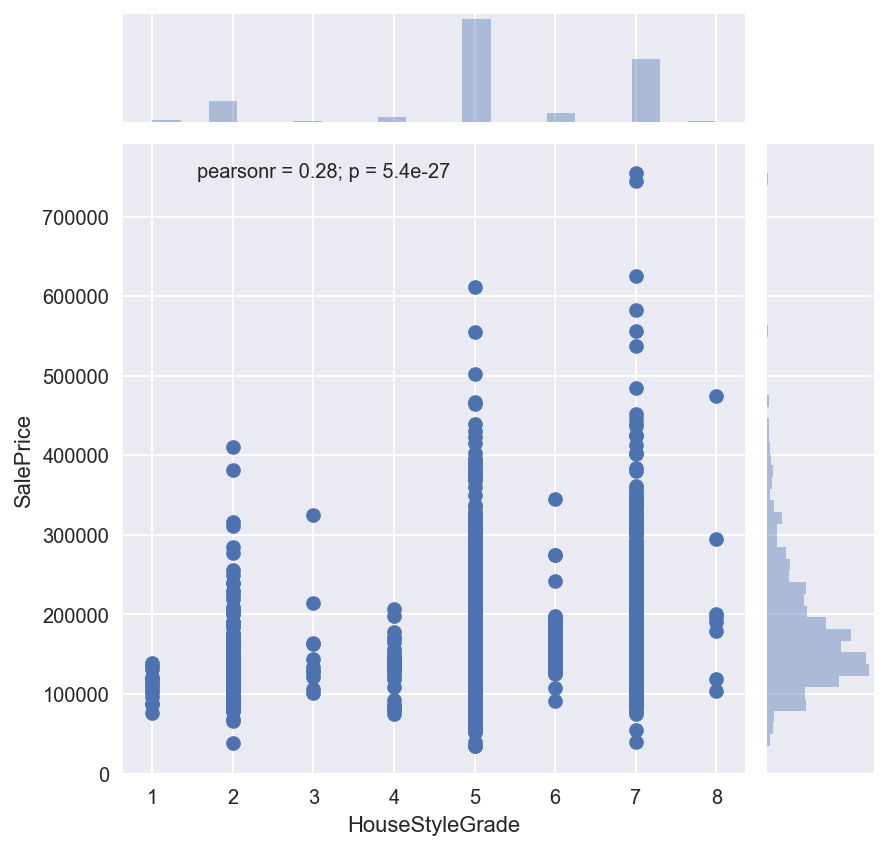

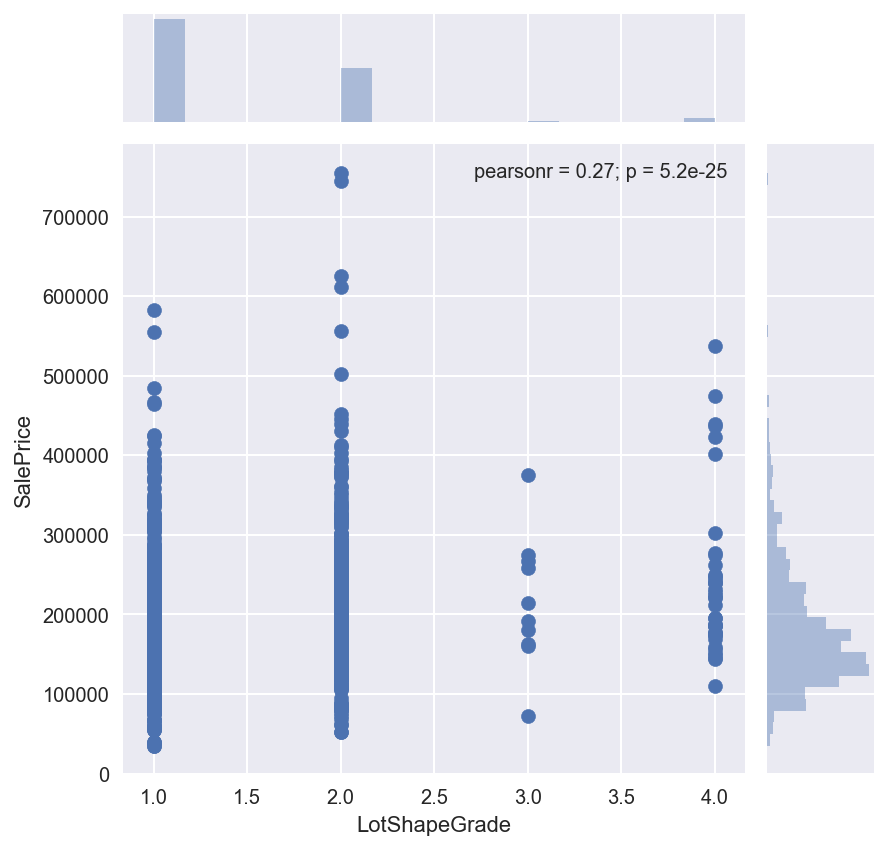

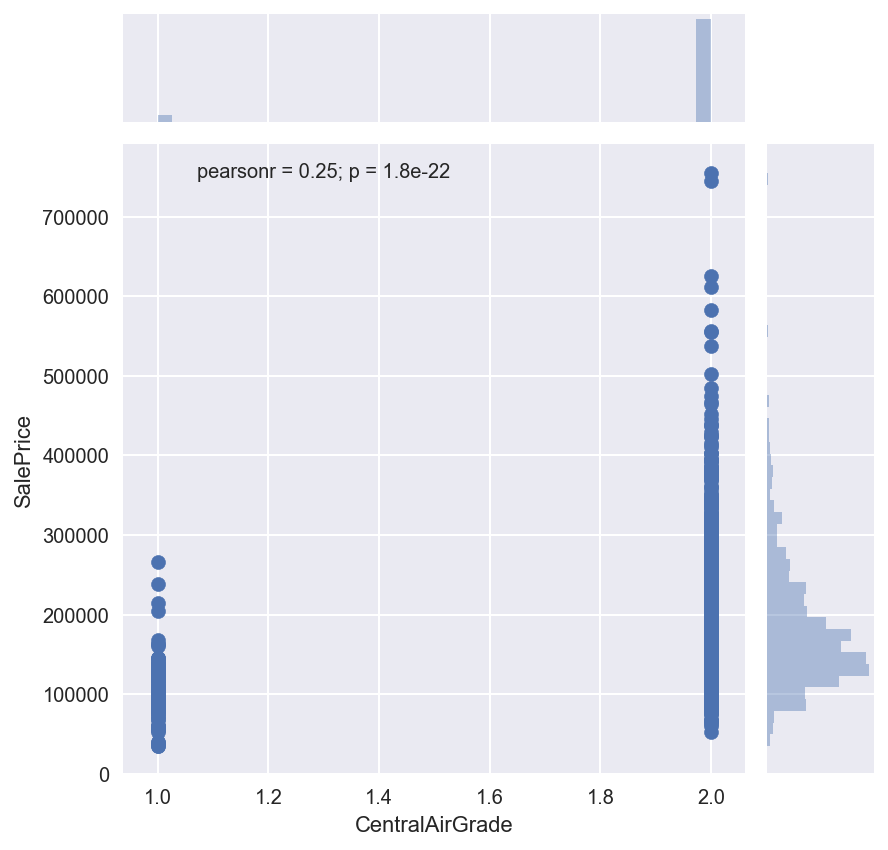

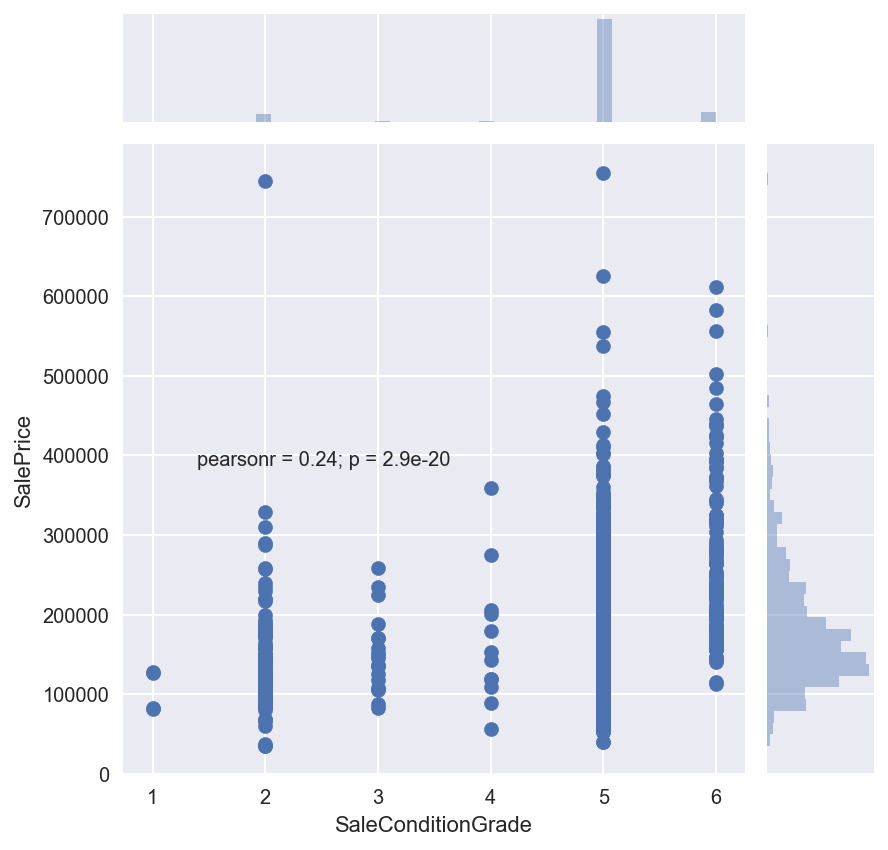

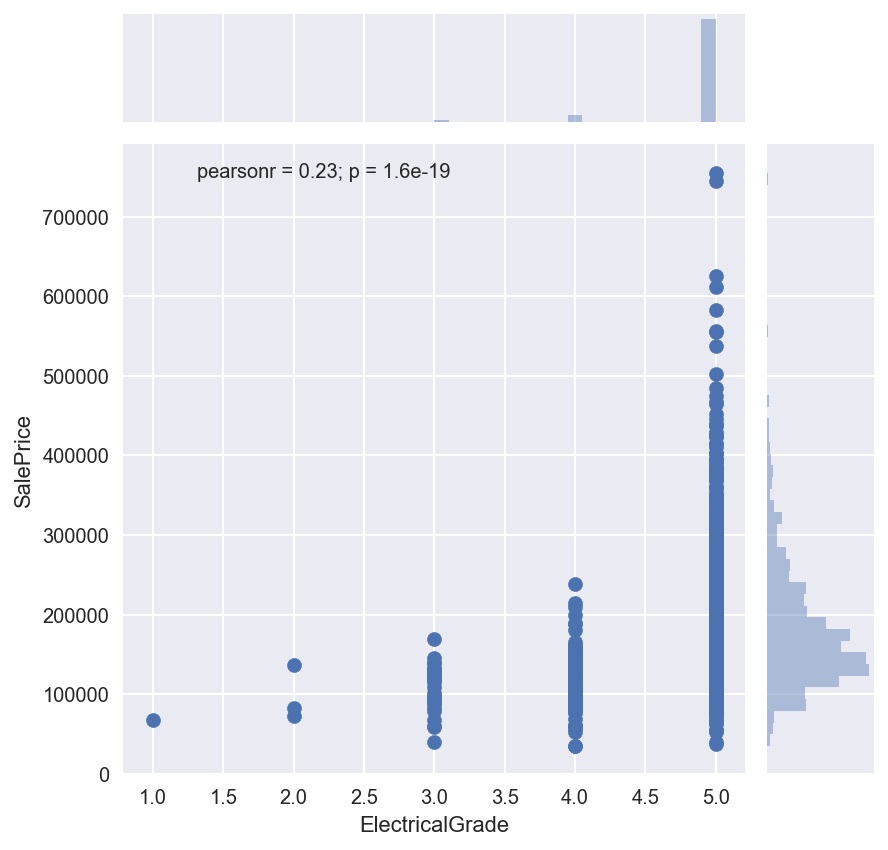

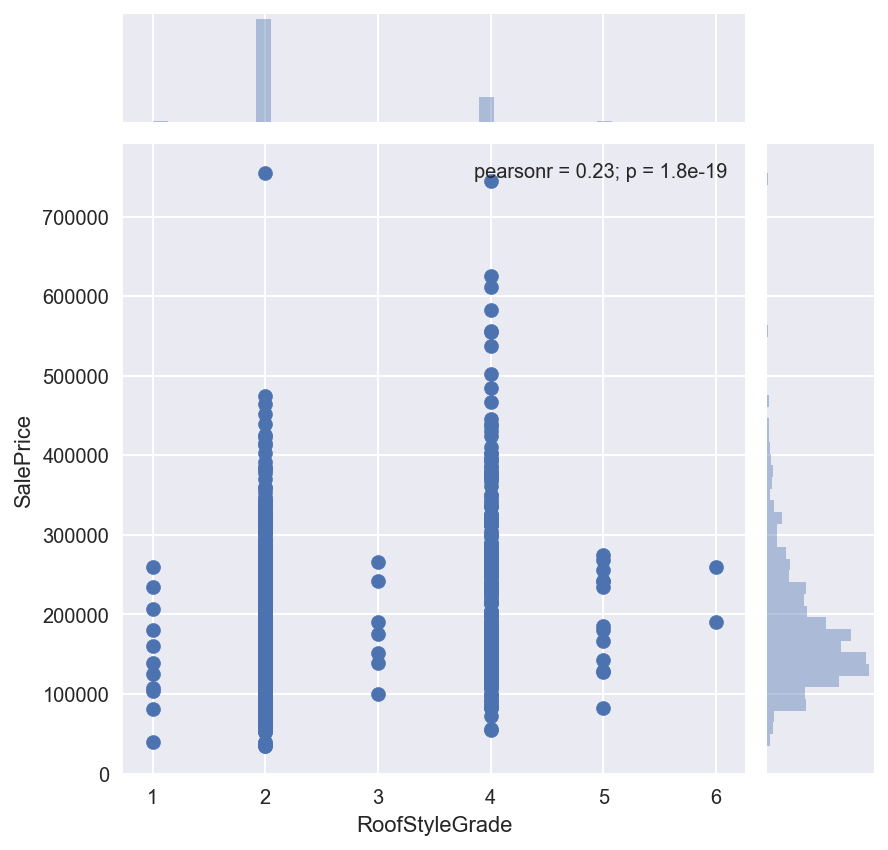

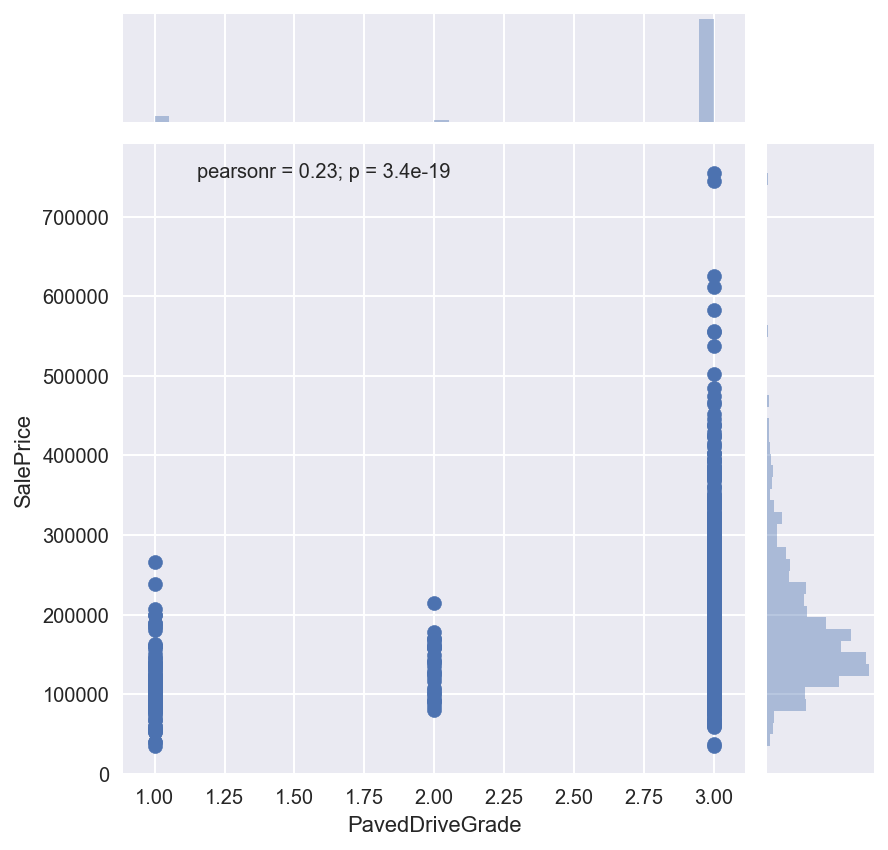

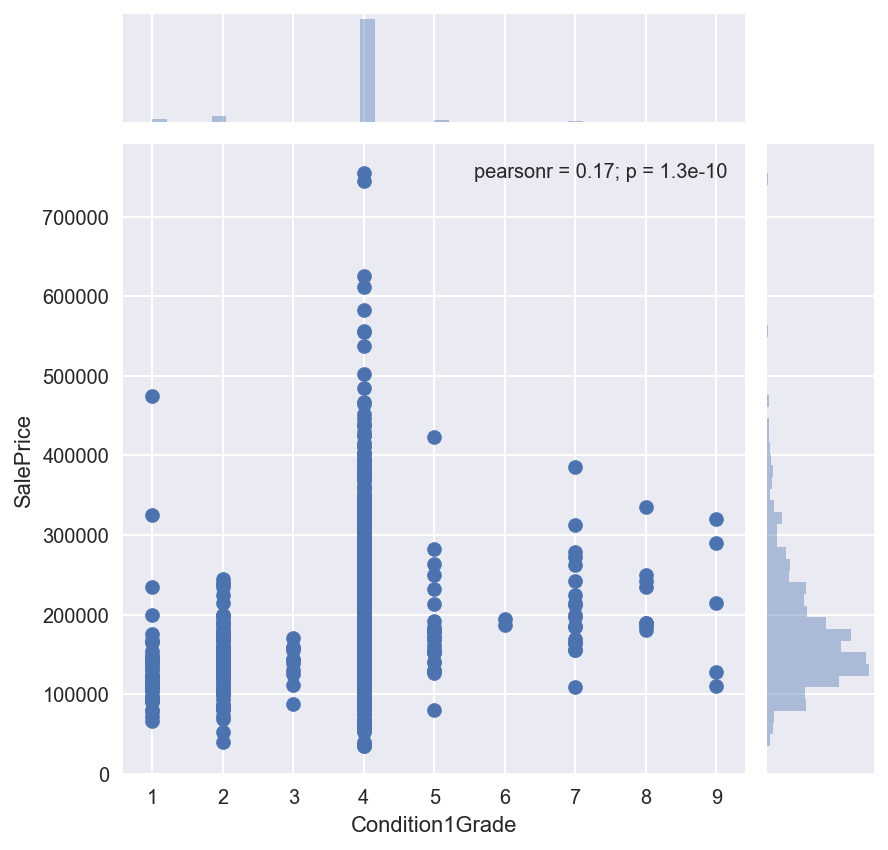

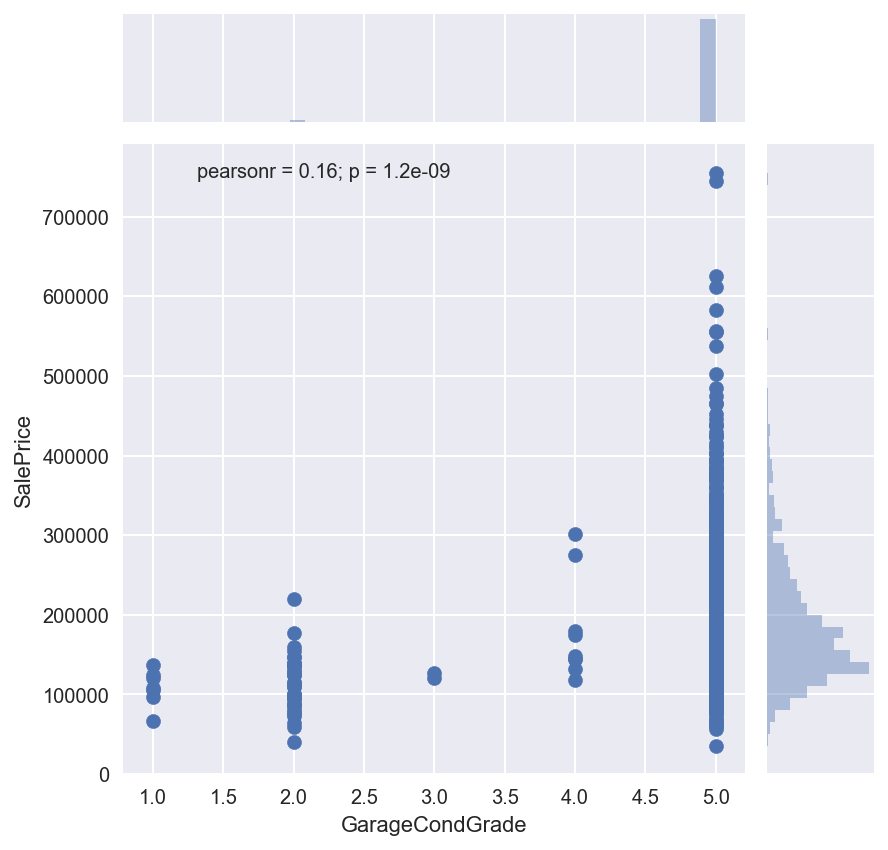

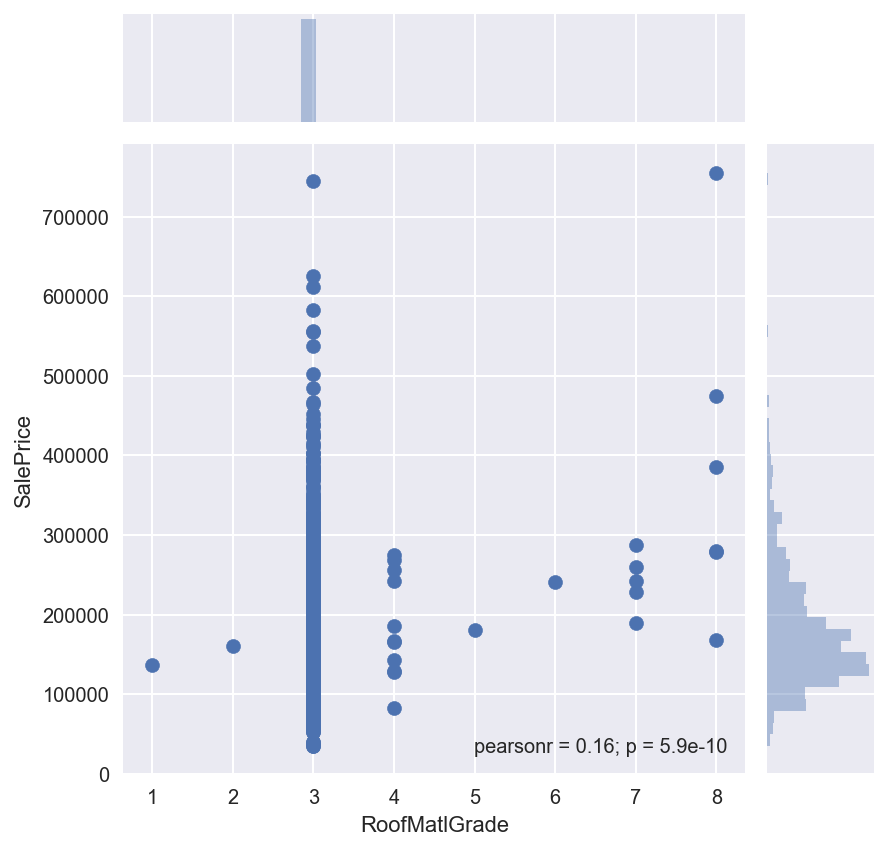

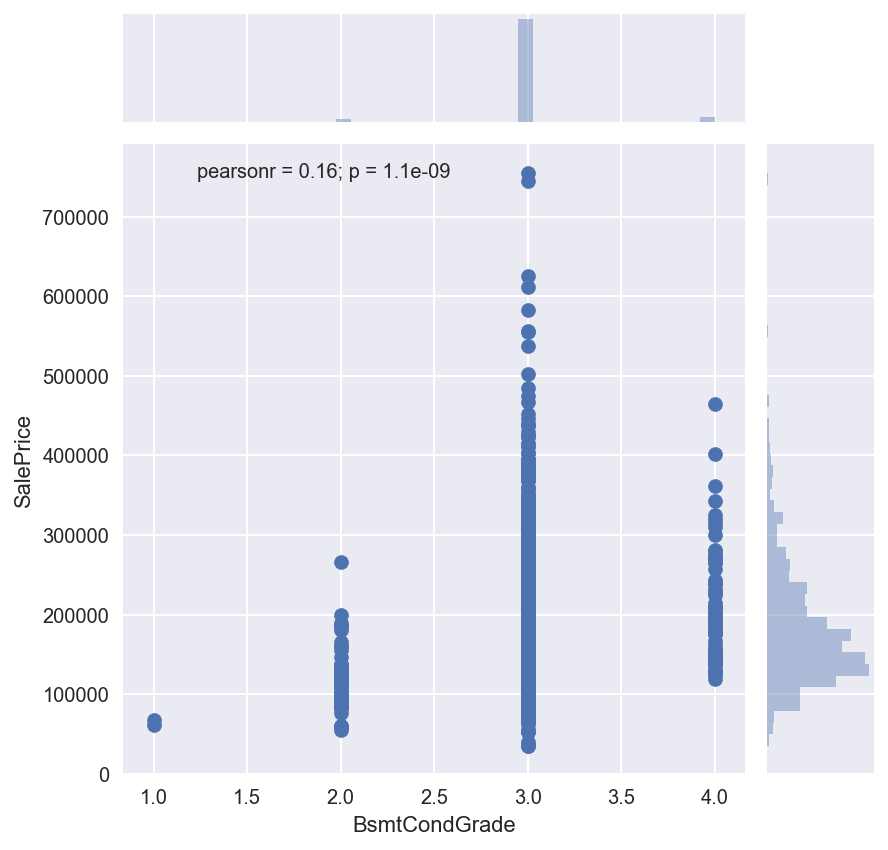

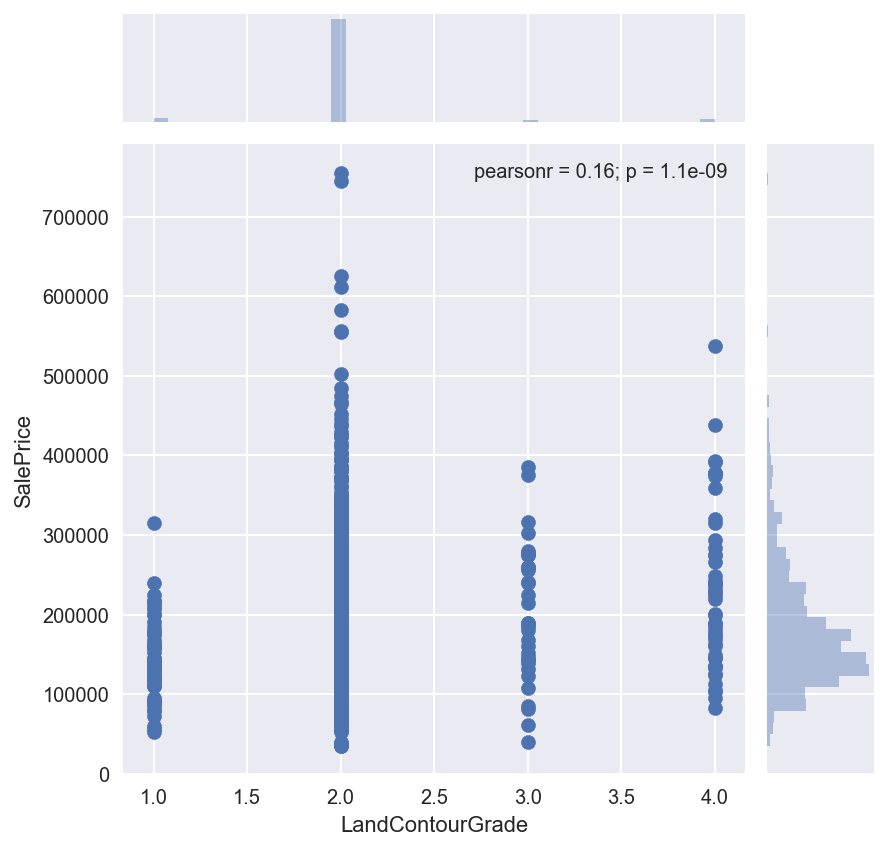

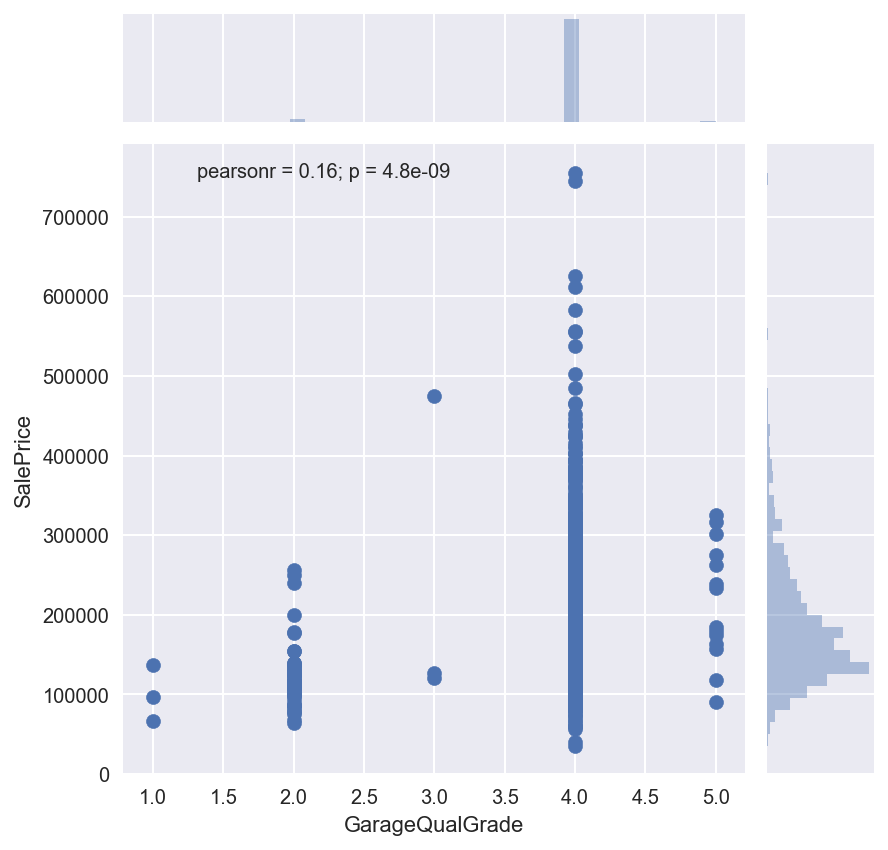

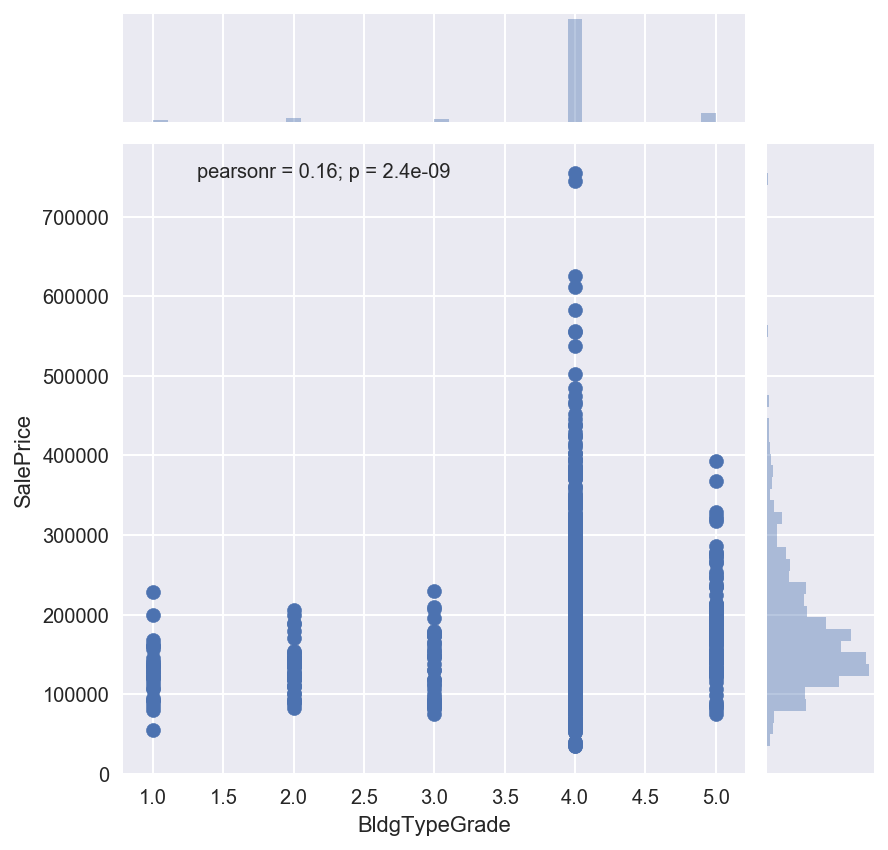

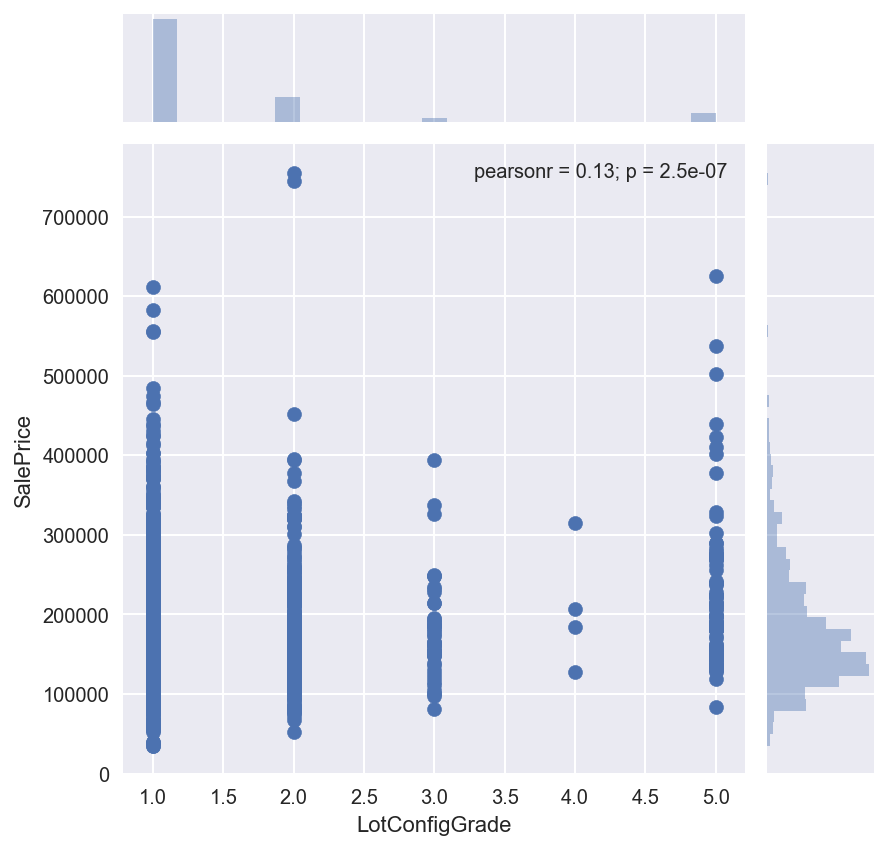

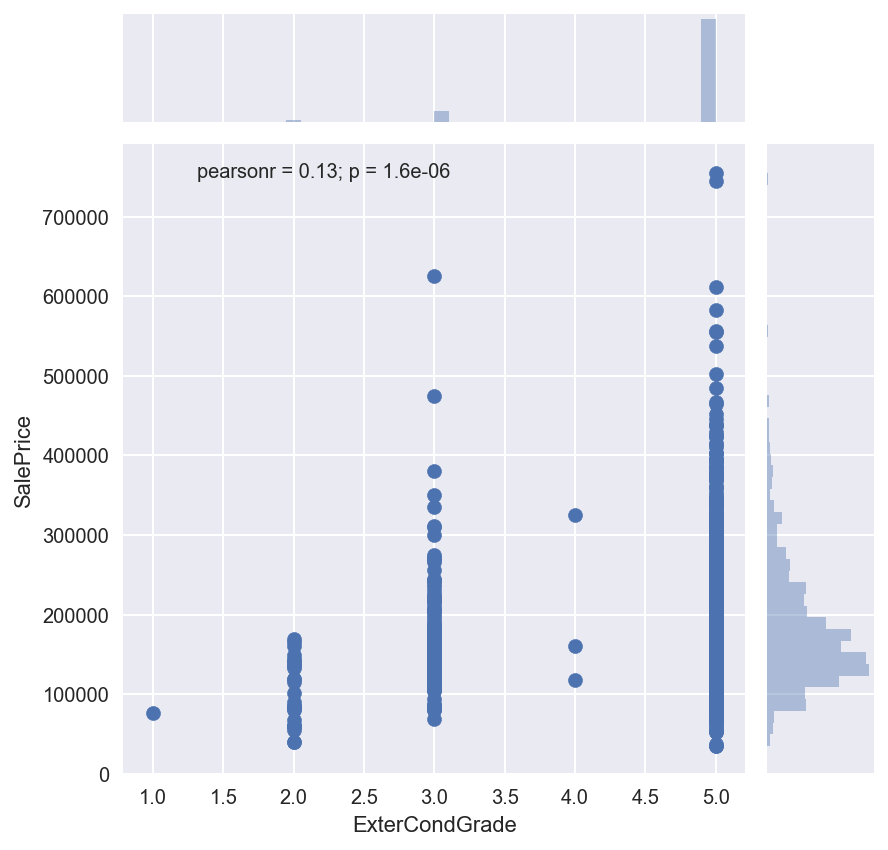

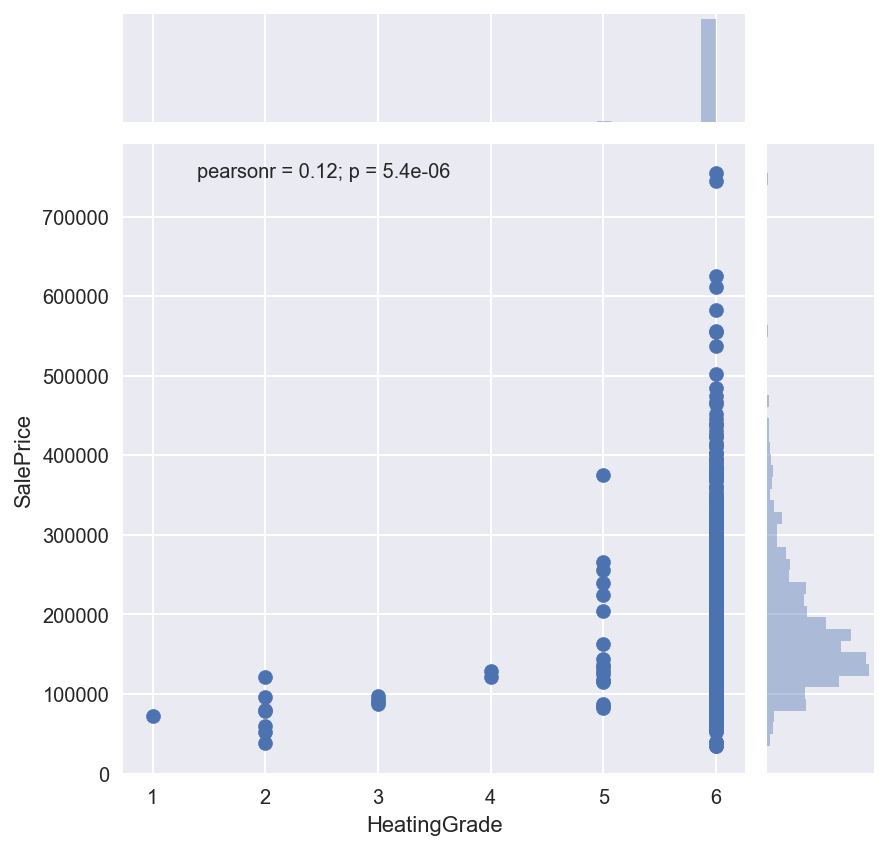

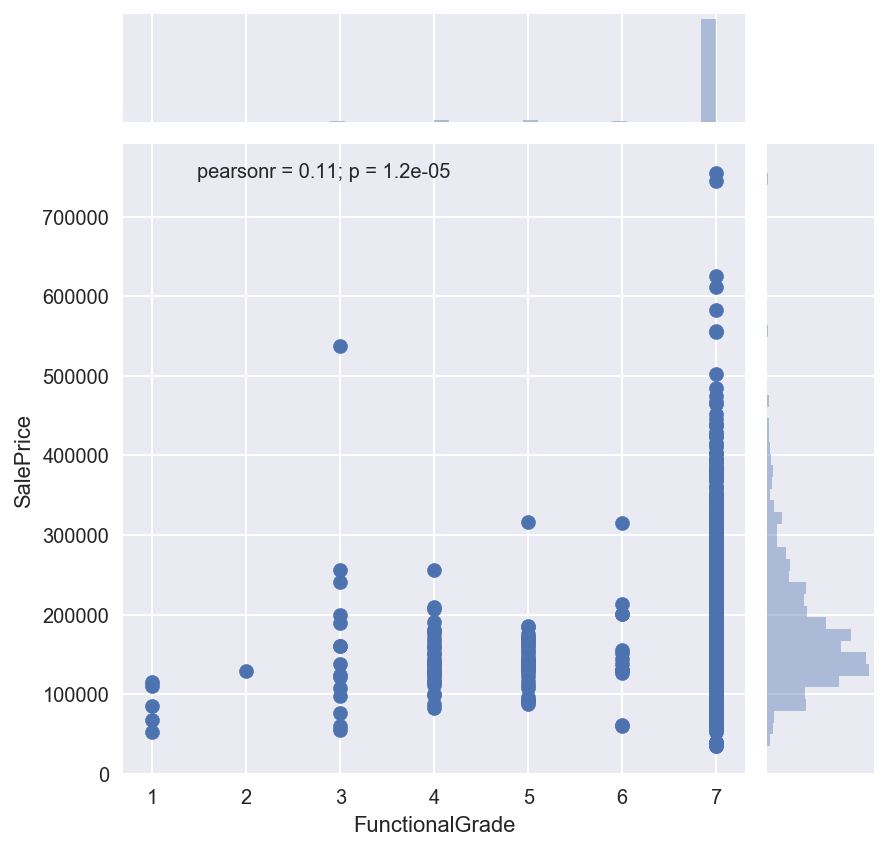

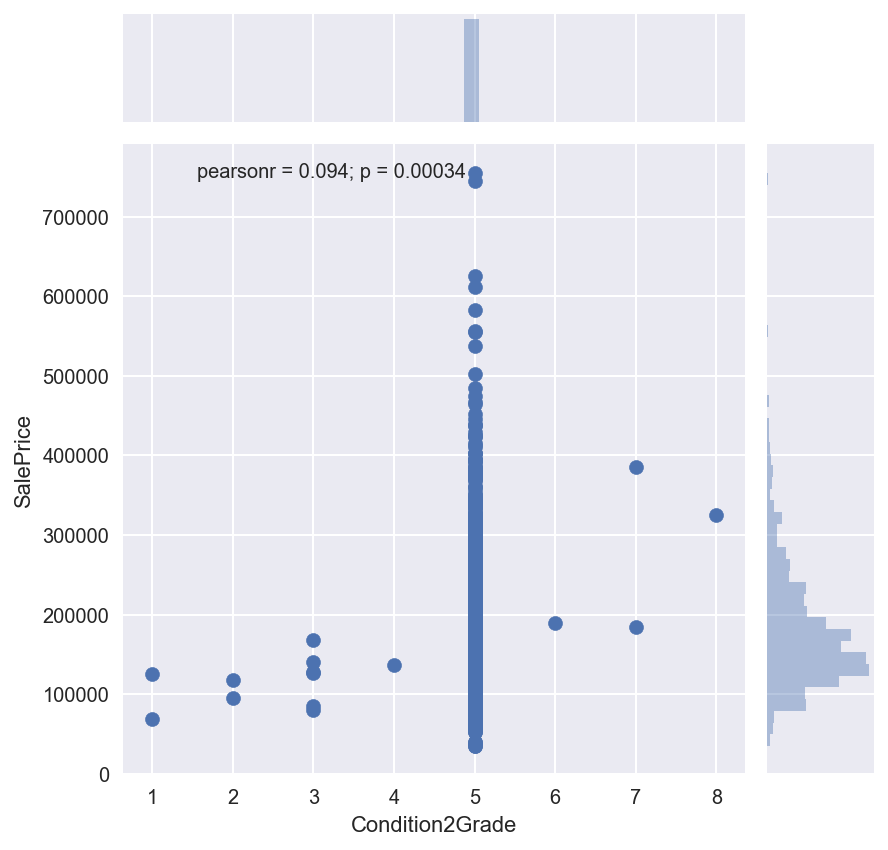

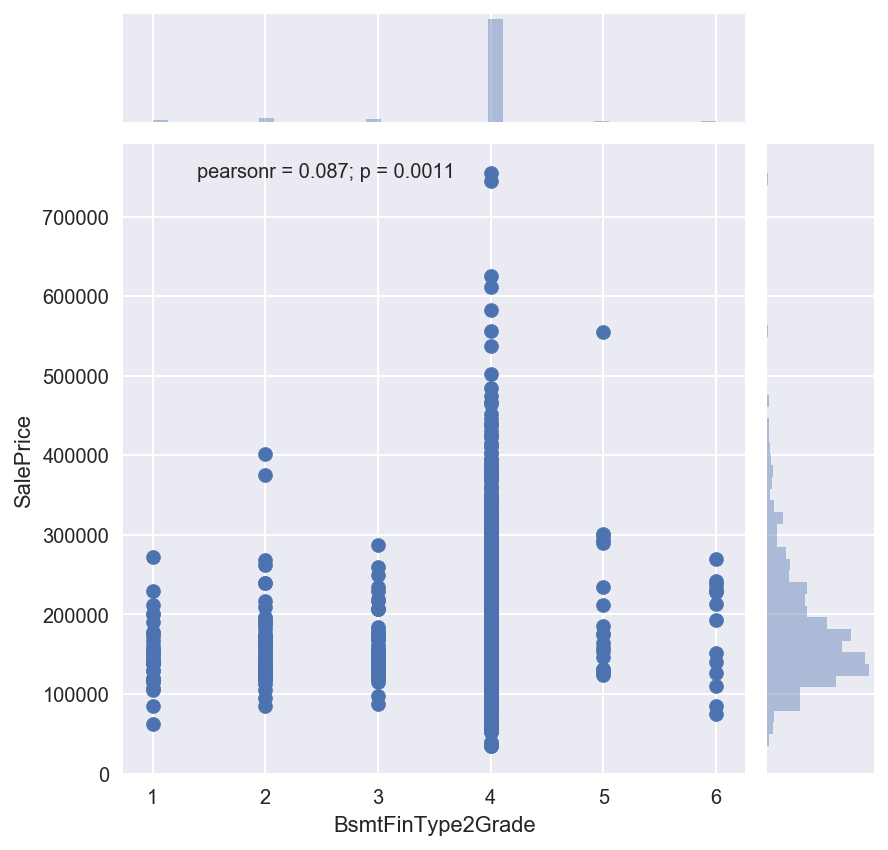

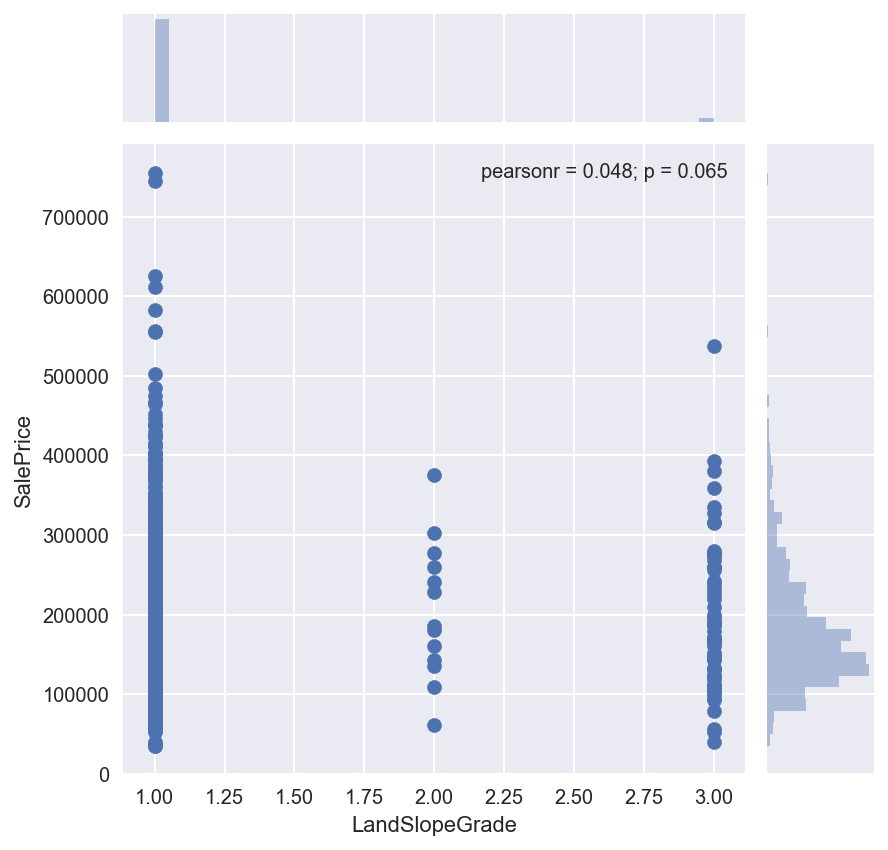

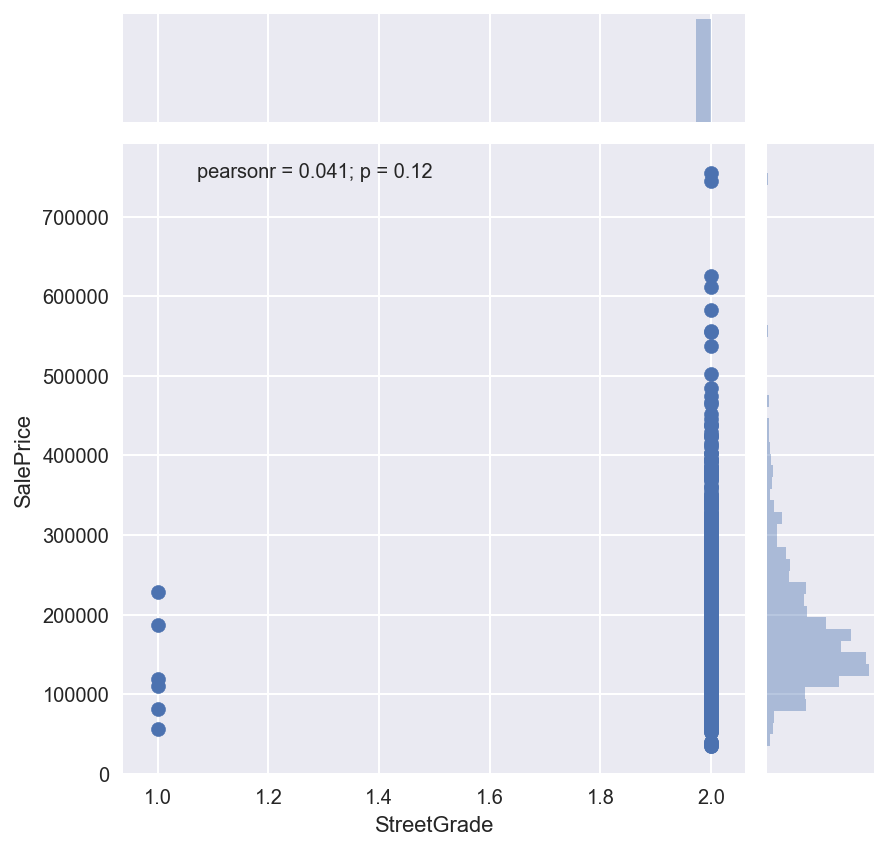

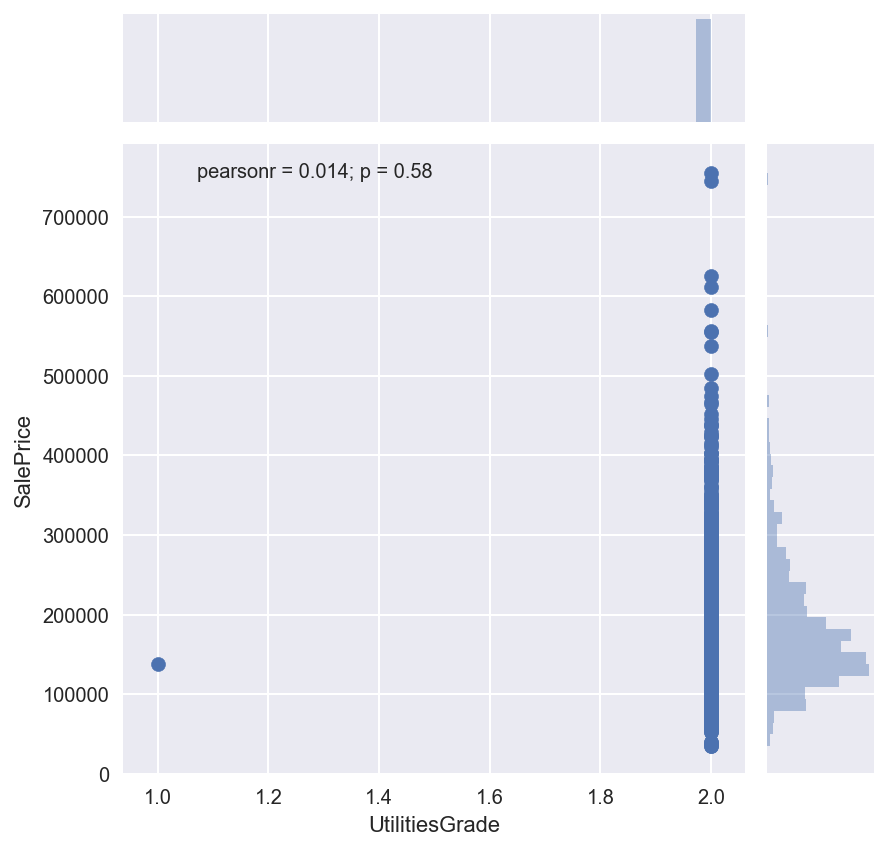

In [9]:
for col_name in heat_colname[1:]:
    sns.jointplot(x=col_name, y="SalePrice", data=df_new) 